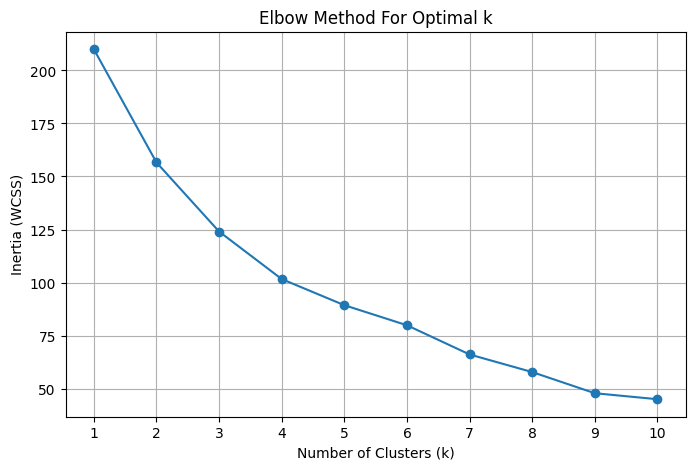

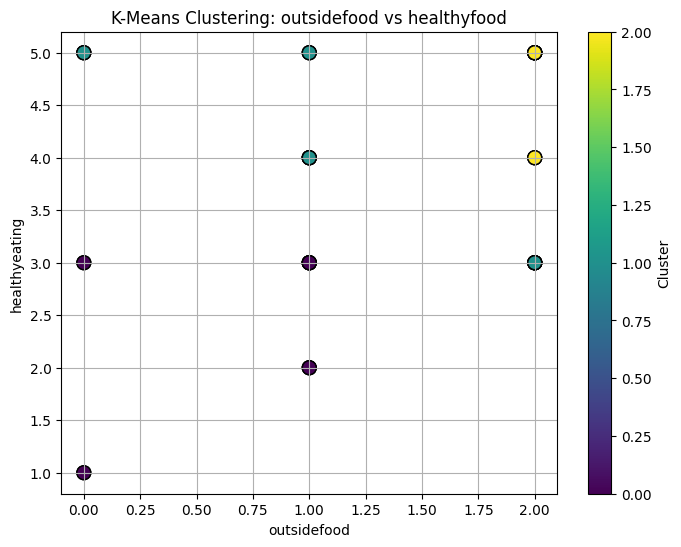

 Number of Clusters Used: 3

 Number of Points in Each Cluster:
Cluster
1    19
0    17
2     6
Name: count, dtype: int64

Cluster Centers (scaled values):
Cluster 0: [-0.46607384 -0.70634183 -0.68512778 -0.70654718 -0.20793983]
Cluster 1: [ 0.39705003  0.59255914  0.29182685  0.25672032 -0.46108397]
Cluster 2: [0.06321746 0.12486459 1.01707701 1.18893598 2.04926208]

 Sample Data with Cluster Assignments:
   OutsideFoodFreq  HealthyEating  Cluster
0                1              4        1
1                1              3        0
2                1              4        0
3                2              5        2
4                2              5        1


['scaler.pkl']

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# === Load your dataset ===
df = pd.read_csv("/content/dataset.csv")

# Drop irrelevant columns
df = df.drop(["Timestamp", "Name"], axis=1)

# Rename columns for convenience
df.columns = ['SleepHours', 'HealthyEating', 'OutsideFoodFreq', 'WaterIntake', 'FoodPreference']

# Encode categorical columns
label_encoders = {}
for col in ['OutsideFoodFreq', 'FoodPreference']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders

# Drop any missing values
df = df.dropna()

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# === Apply KMeans clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# === Elbow Method Plot ===
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    kmeans_k.fit(scaled_data)
    inertia.append(kmeans_k.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.xticks(k_range)
plt.savefig("elbow_method.png")
plt.show()

# === Scatter Plot (Sleep vs Water Intake) ===
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['OutsideFoodFreq'], df['HealthyEating'], c=df['Cluster'], cmap='viridis', s=100, edgecolors='k')
plt.xlabel("outsidefood")
plt.ylabel("healthyeating")
plt.title("K-Means Clustering: outsidefood vs healthyfood")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.savefig("output_screenshot.png")
plt.show()

# === View Cluster Information ===
print(" Number of Clusters Used:", kmeans.n_clusters)
print("\n Number of Points in Each Cluster:")
print(df['Cluster'].value_counts())

print("\nCluster Centers (scaled values):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {center}")

# (Optional) View sample cluster assignments
print("\n Sample Data with Cluster Assignments:")
print(df[['OutsideFoodFreq', 'HealthyEating', 'Cluster']].head())

# === Save model and encoders ===
joblib.dump(kmeans, "model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")
